<h1>Explorartory Data Analysis</h1>

In [1]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

ImportError: DLL load failed while importing _cext: The specified module could not be found.

In [2]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [3]:
# to save model
import joblib

In [4]:
#Reading csv file
df = pd.read_csv('data/train.csv')
df.head()

NameError: name 'pd' is not defined

In [5]:
df.tail()

NameError: name 'df' is not defined

In [6]:
df.rename(columns={'S/N': 'RollNo'}, inplace = True)

In [7]:
#features of the dataset
df.columns

Index(['RollNo', 'Gender', 'Age', 'Location', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'higher', 'internet', 'famrel',
       'freetime', 'health', 'absences', 'Score'],
      dtype='object')

In [8]:
#Representation of the statistical data
df.describe()

,RollNo,Age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,absences,Score
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,163.000000,11.320000,2.710769,2.476923,1.449231,1.956923,0.184615,3.926154,3.178462,3.590769,4.341538,35.713846
std,93.963645,1.123157,1.086977,1.093015,0.725234,0.819133,0.579812,0.913256,0.987029,1.438634,5.200038,6.732175
min,1.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,20.000000
25%,82.000000,10.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,3.000000,3.000000,0.000000,31.000000
50%,163.000000,11.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,4.000000,2.000000,36.000000
75%,244.000000,12.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,5.000000,6.000000,40.000000
max,325.000000,17.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,32.000000,53.000000


In [9]:
df.isnull().sum()

RollNo        0
Gender        0
Age           0
Location      0
famsize       0
Pstatus       0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
famrel        0
freetime      0
health        0
absences      0
Score         0
dtype: int64

As per the above data there are no null values present

In [10]:
#Checking the duplicate data
df.duplicated().sum()

0

In [19]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
corr

,RollNo,Age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,absences,Score
RollNo,1.000000,0.673927,-0.209204,-0.175051,0.083653,-0.047959,0.071664,-0.047764,-0.073978,-0.075734,0.185527,-0.078188
Age,0.673927,1.000000,-0.146428,-0.192583,0.035163,-0.068840,0.307116,-0.019017,-0.062809,-0.033313,0.270823,-0.218478
Medu,-0.209204,-0.146428,1.000000,0.625634,-0.210531,0.089956,-0.203949,-0.002927,0.019491,-0.030529,-0.032706,0.234127
Fedu,-0.175051,-0.192583,0.625634,1.000000,-0.162093,-0.004561,-0.178322,0.019931,0.018134,0.008697,0.059223,0.173798
traveltime,0.083653,0.035163,-0.210531,-0.162093,1.000000,-0.092015,0.081078,0.008302,-0.030421,-0.036245,0.037758,-0.123410
studytime,-0.047959,-0.068840,0.089956,-0.004561,-0.092015,1.000000,-0.210651,-0.024894,-0.127890,-0.070006,-0.129136,0.219394
failures,0.071664,0.307116,-0.203949,-0.178322,0.081078,-0.210651,1.000000,-0.009147,0.098652,0.046451,0.174544,-0.408658
famrel,-0.047764,-0.019017,-0.002927,0.019931,0.008302,-0.024894,-0.009147,1.000000,0.155049,0.160162,-0.086311,0.007596
freetime,-0.073978,-0.062809,0.019491,0.018134,-0.030421,-0.127890,0.098652,0.155049,1.000000,0.095062,-0.046790,-0.050816
health,-0.075734,-0.033313,-0.030529,0.008697,-0.036245,-0.070006,0.046451,0.160162,0.095062,1.000000,-0.064186,-0.157126


<h3>Data Visualizations</h3>

<Axes: >

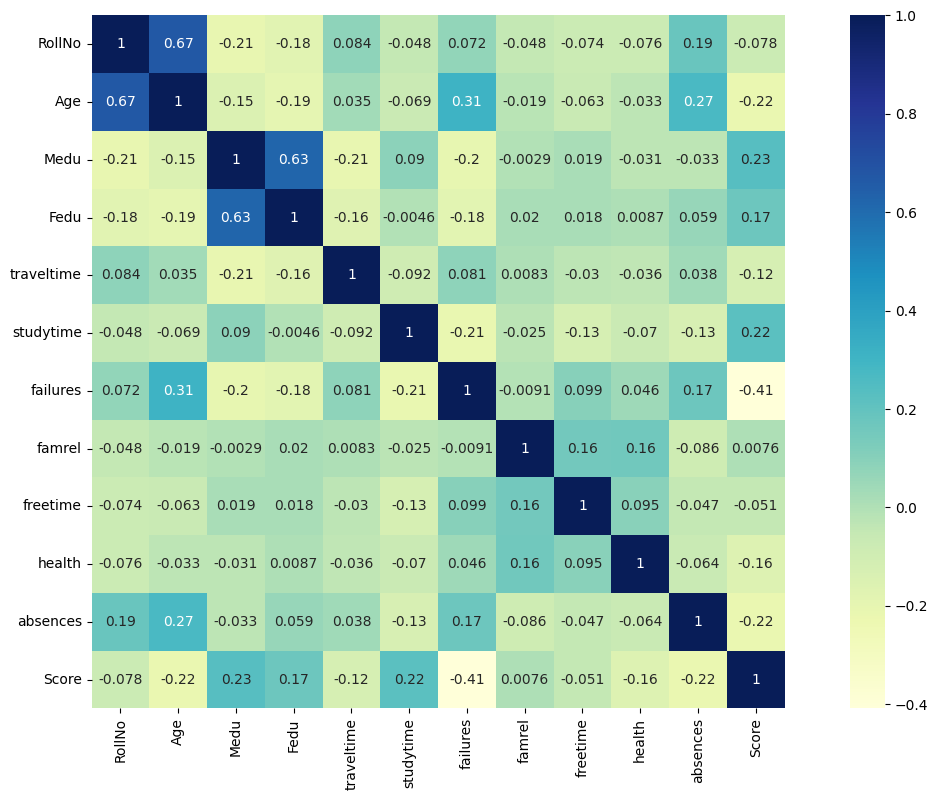

In [20]:
plt.figure(figsize = (17, 9))
sns.heatmap(corr, annot = True, cmap="YlGnBu", square=True)

Visualising between score and failures

<Axes: xlabel='Score', ylabel='failures'>

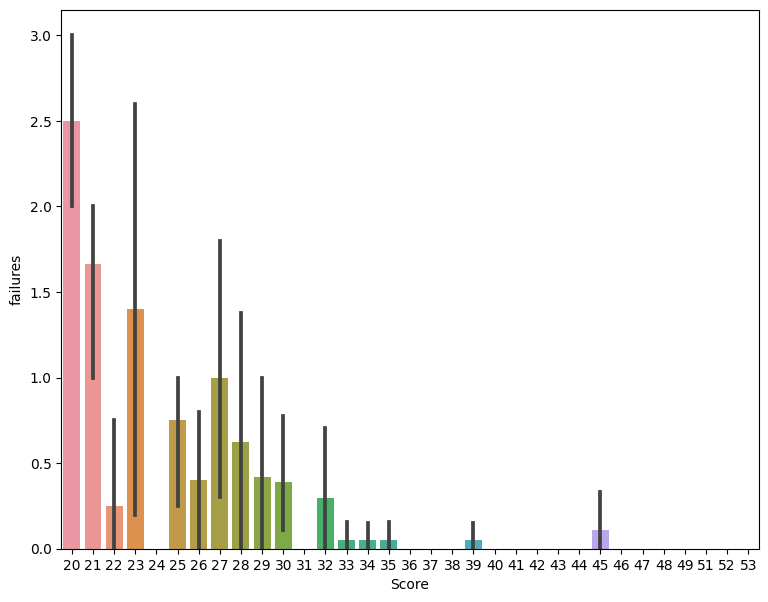

In [21]:
plt.figure(figsize = (9, 7))
sns.barplot(x = 'Score', y ='failures', data = df)

As per the above visualizations you can see If scores are low there is high chance of failure which impacts performance.

Visualizing between Internet and the score

<Axes: xlabel='internet', ylabel='count'>

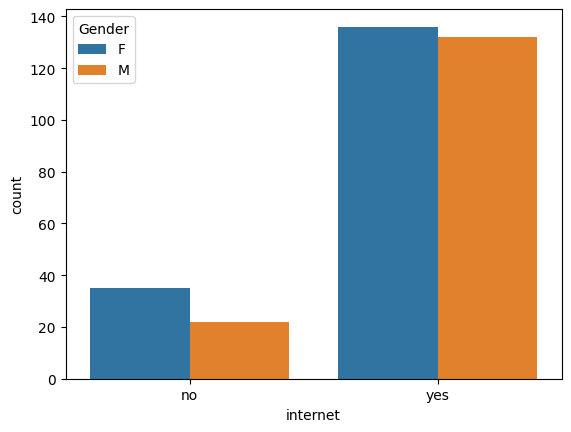

In [22]:
#univariate Analysis for finding how many people using internet
sns.countplot(x = 'internet',data = df, hue = 'Gender')

<Axes: xlabel='internet', ylabel='Score'>

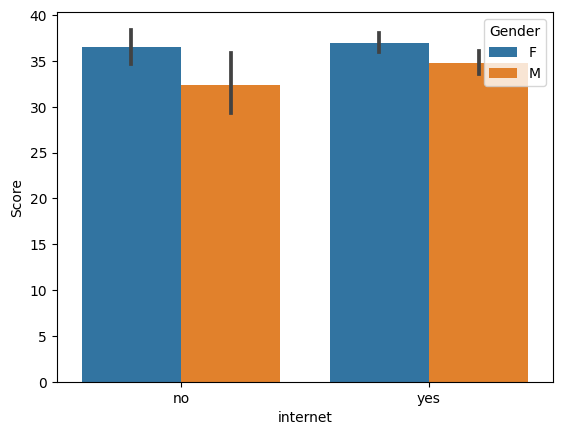

In [23]:
sns.barplot(x = 'internet', y = 'Score', data = df, hue = 'Gender')

So As per the above two visualizations there are huge number of students using internet but it slightly helped to improve the performance of students

Visualizing data between family-size and scores

<Axes: xlabel='famsize', ylabel='Score'>

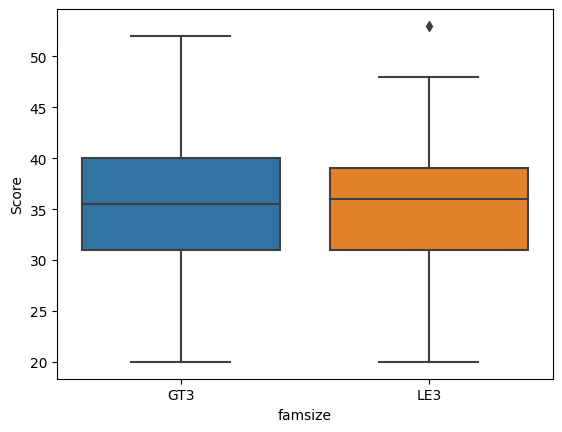

In [24]:
sns.boxplot(x='famsize',y='Score',data=df)

As we can see if the family members are Greater than 3 that students are well performing than LE3 .  

Visualizing between Scores and absences

<Axes: xlabel='absences', ylabel='Score'>

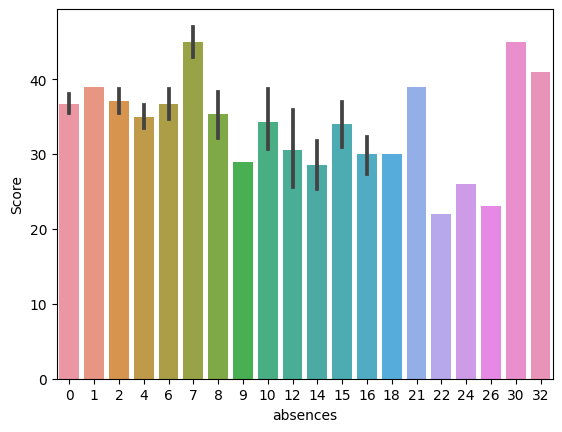

In [25]:
sns.barplot(x = 'absences', y = 'Score', data = df)

Visualization between mother education and score

<Axes: xlabel='Medu', ylabel='Score'>

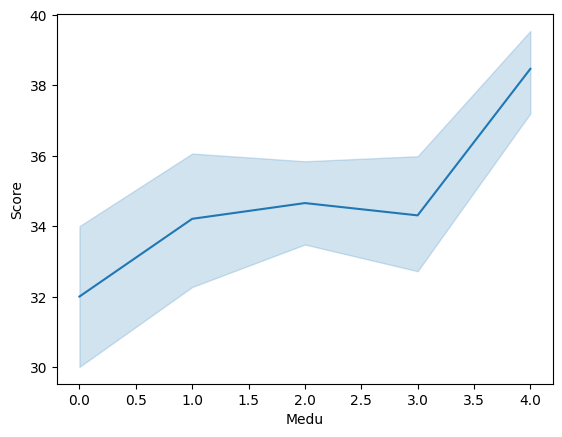

In [26]:
sns.lineplot(x = 'Medu', y = 'Score', data = df)

It is showing positive correlation between Medu and Students Score

Visualization between mother education and score

<Axes: xlabel='Fedu', ylabel='Score'>

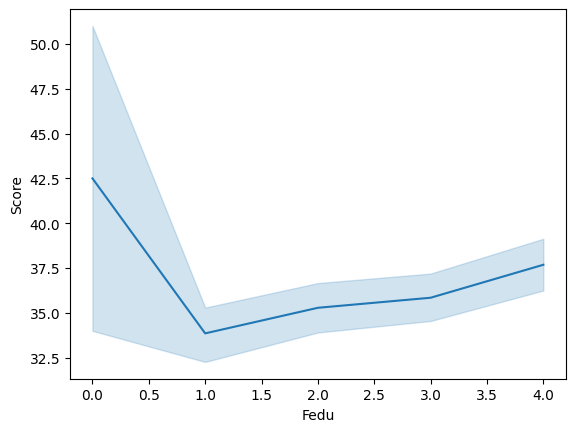

In [27]:
sns.lineplot(x = 'Fedu', y = 'Score', data = df)

Visualizing between Study Time and Score

<Axes: xlabel='studytime', ylabel='Score'>

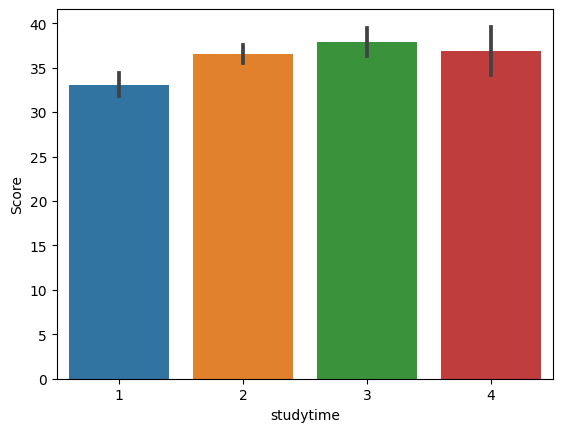

In [28]:
sns.barplot(x = 'studytime', y = 'Score', data = df)

Above Visualizations are showing the increasing trends for those study upto 10 hours but it is slightly low for those studying >= 10 hours

<Axes: xlabel='paid', ylabel='count'>

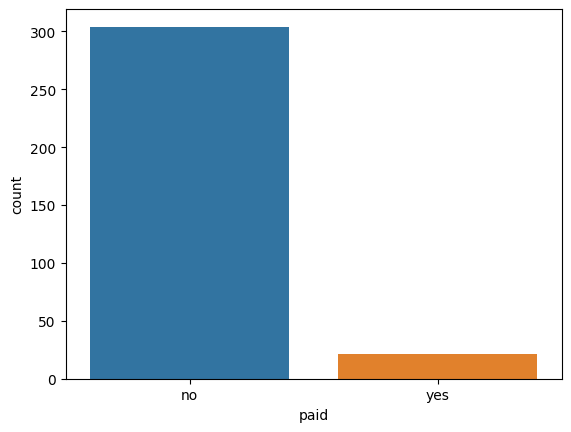

In [29]:
sns.countplot(x = 'paid', data = df)

So there are less number of students who have paid for extra classes.

Univariate analysis for activities

<Axes: xlabel='activities', ylabel='count'>

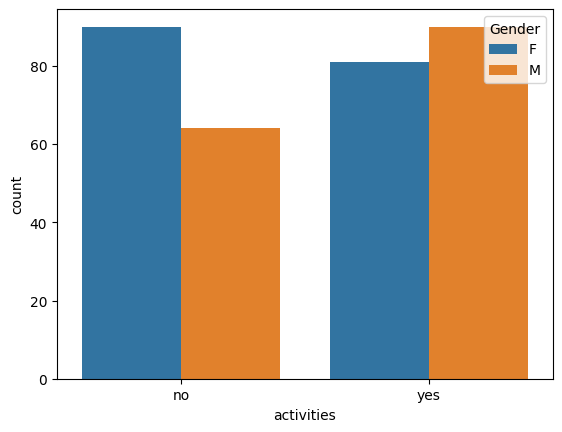

In [30]:
sns.countplot(x = 'activities', data = df, hue = 'Gender')

Female students are taking more part in extra curricular activities

<Axes: xlabel='activities', ylabel='Score'>

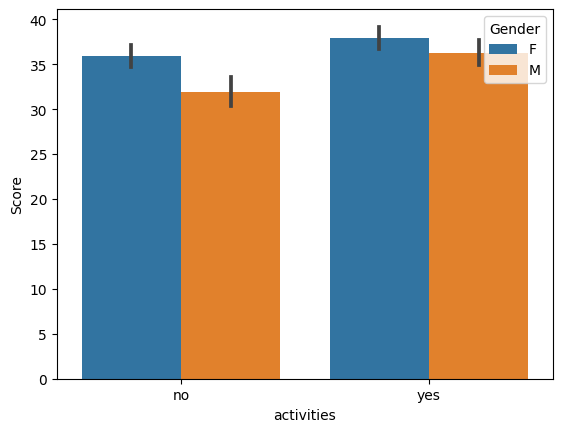

In [31]:
sns.barplot(x = 'activities', y = 'Score', data = df, hue = 'Gender')

So From the above visualizations those who are taking part in extra curricular activities are having high scores then those who are not taking part

Visualizing between free time and score

<Axes: xlabel='freetime', ylabel='Score'>

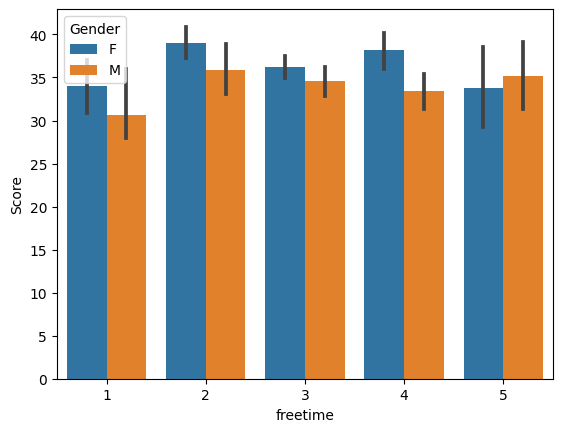

In [32]:
sns.barplot(x = 'freetime', y = 'Score', data = df, hue = 'Gender')

Above visualizations show no relations between freetime and students performance

Visualizing between Pstatus and Score

<Axes: xlabel='Pstatus', ylabel='Score'>

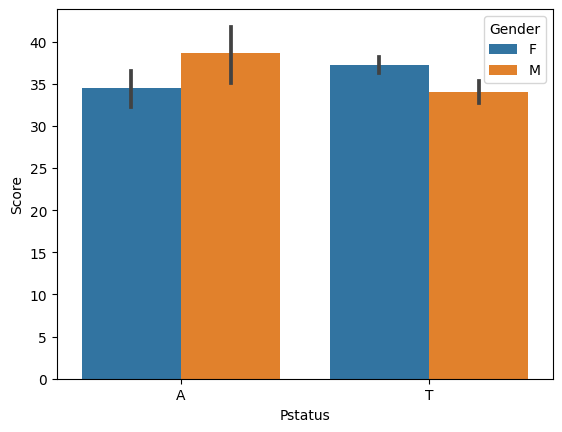

In [33]:
sns.barplot(x = 'Pstatus', y = 'Score', data = df, hue = 'Gender')

Visualizing between Health and Score

<Axes: xlabel='health', ylabel='Score'>

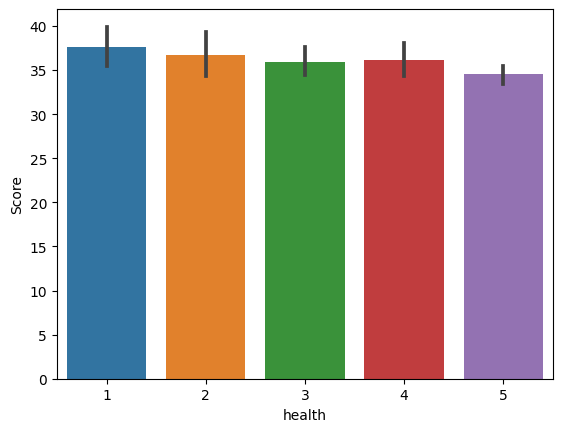

In [34]:
sns.barplot(x = 'health', y = 'Score', data = df)

Visualizing between Location and Score

<Axes: xlabel='Location', ylabel='Score'>

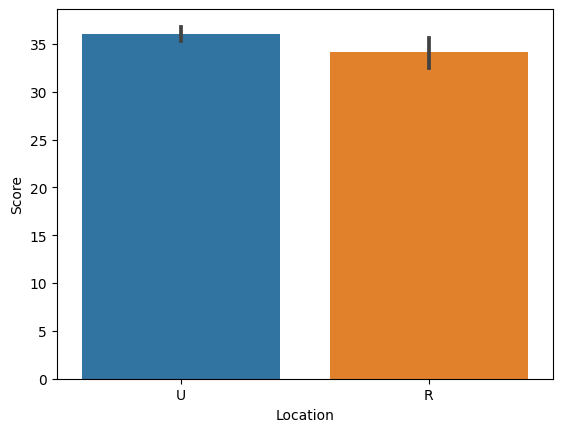

In [35]:
sns.barplot(x = 'Location', y = 'Score', data = df)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RollNo      325 non-null    int64 
 1   Gender      325 non-null    object
 2   Age         325 non-null    int64 
 3   Location    325 non-null    object
 4   famsize     325 non-null    object
 5   Pstatus     325 non-null    object
 6   Medu        325 non-null    int64 
 7   Fedu        325 non-null    int64 
 8   traveltime  325 non-null    int64 
 9   studytime   325 non-null    int64 
 10  failures    325 non-null    int64 
 11  schoolsup   325 non-null    object
 12  famsup      325 non-null    object
 13  paid        325 non-null    object
 14  activities  325 non-null    object
 15  nursery     325 non-null    object
 16  higher      325 non-null    object
 17  internet    325 non-null    object
 18  famrel      325 non-null    int64 
 19  freetime    325 non-null    int64 
 20  health    

In [37]:
# sns.pairplot(df)
# plt.show()

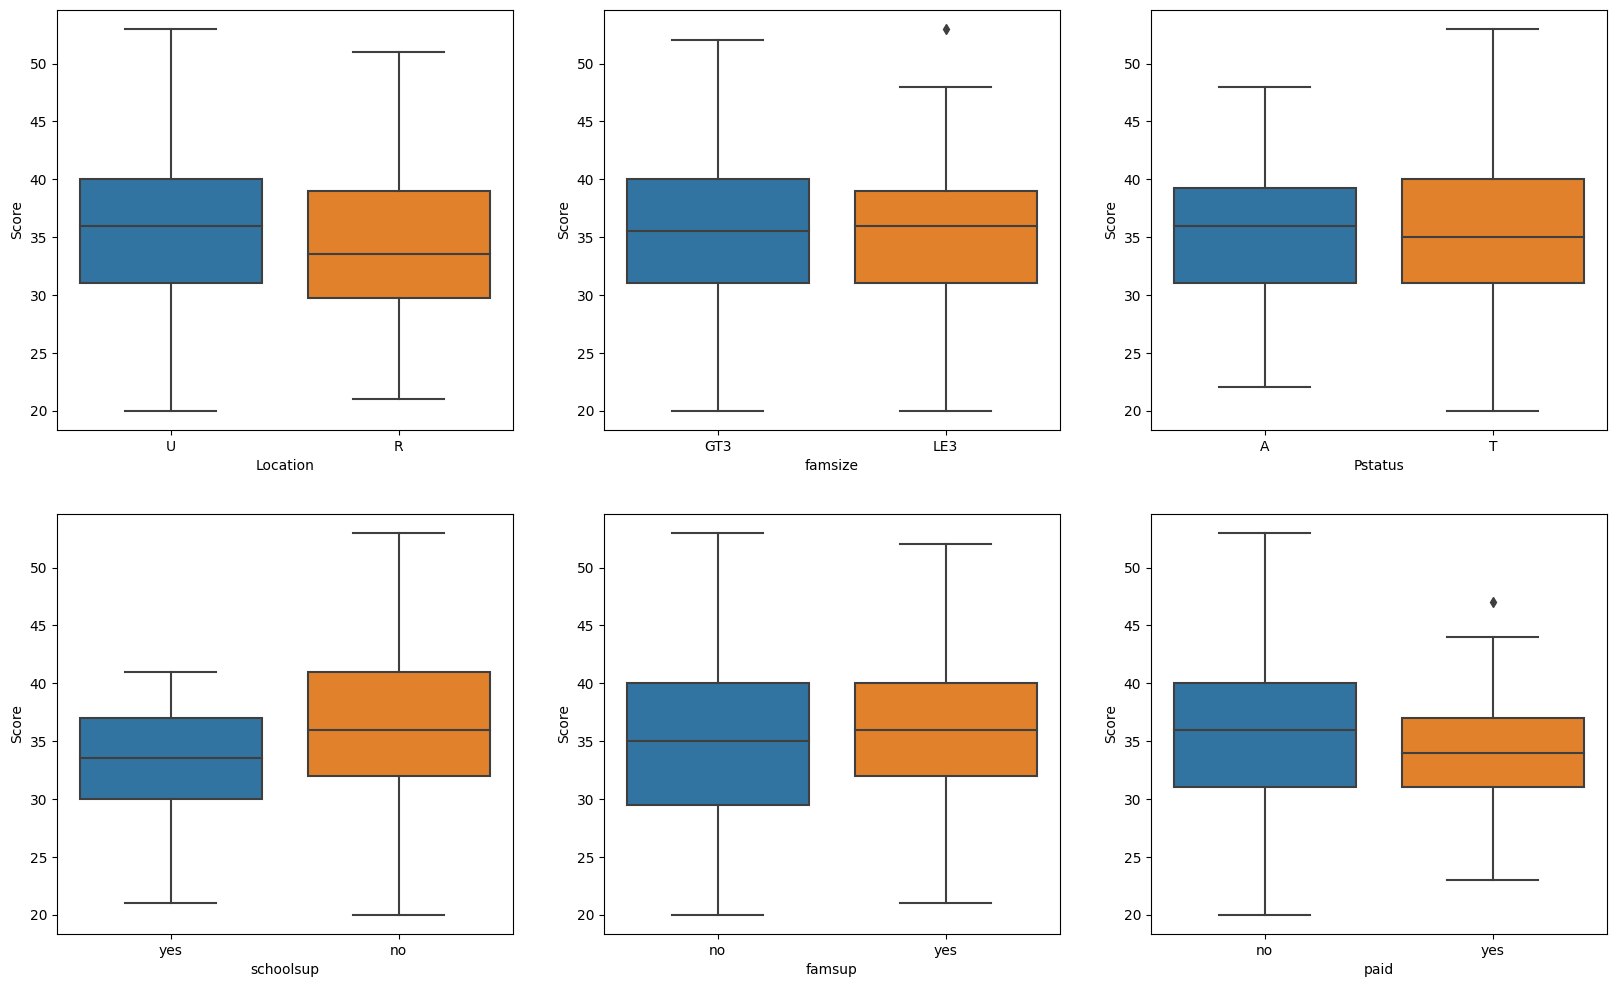

In [38]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Location', y = 'Score', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'famsize', y = 'Score', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'Pstatus', y = 'Score', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'schoolsup', y = 'Score', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'famsup', y = 'Score', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'paid', y = 'Score', data = df)
plt.show()

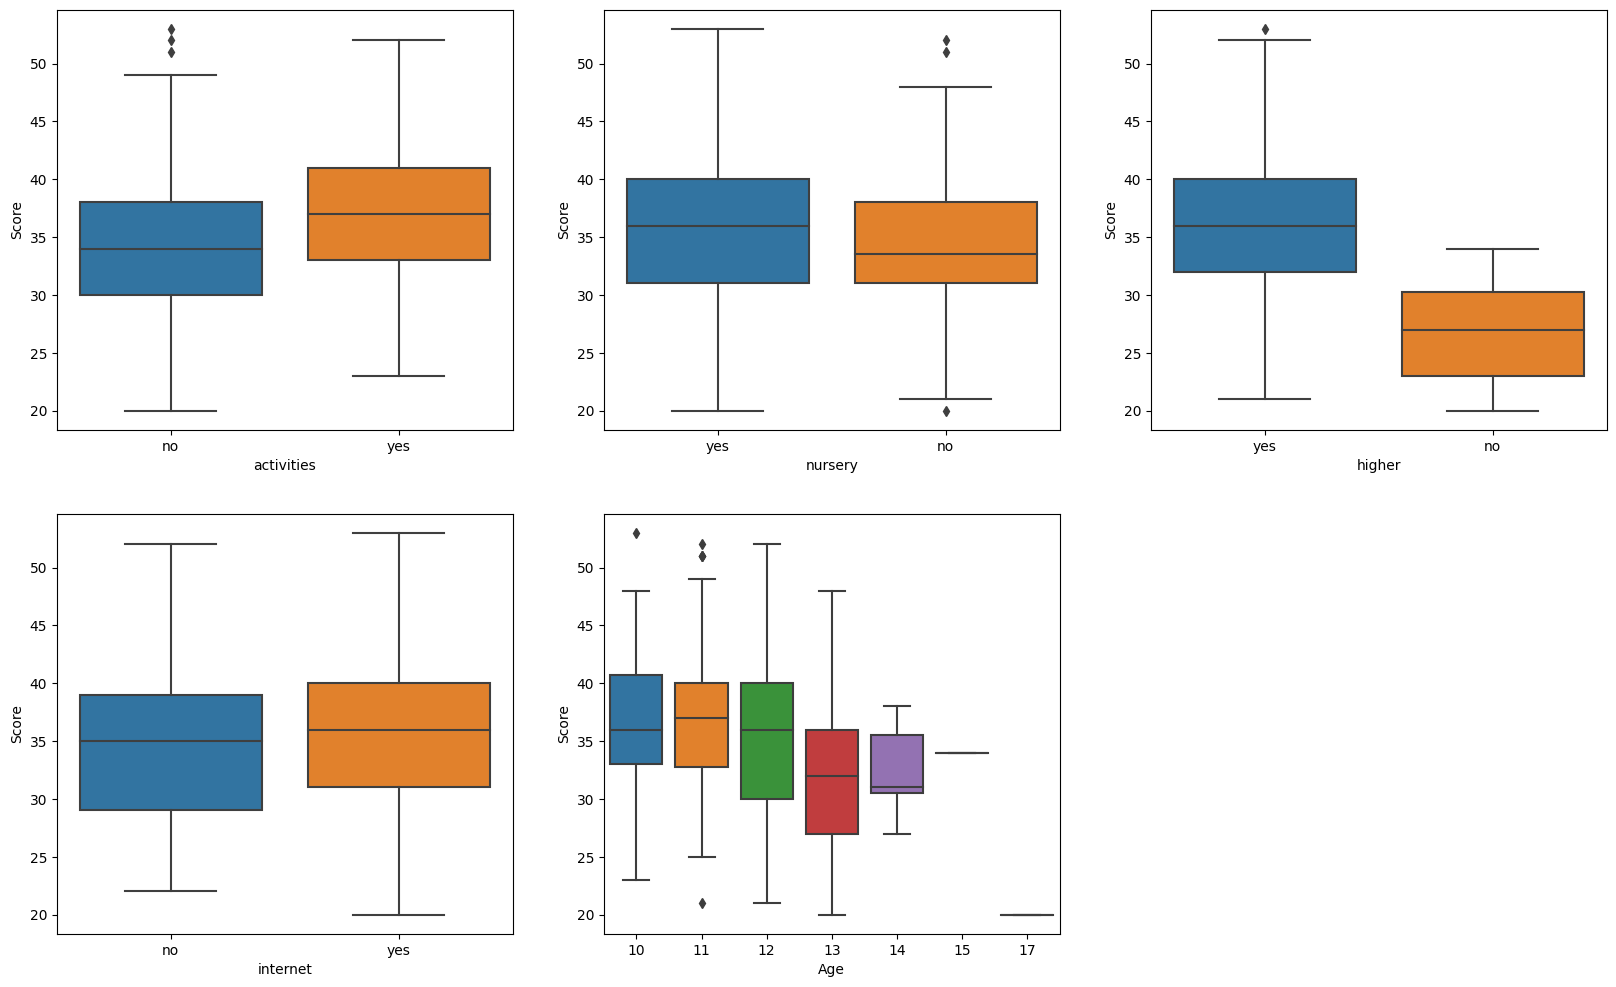

In [39]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'activities', y = 'Score', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'nursery', y = 'Score', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'higher', y = 'Score', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'internet', y = 'Score', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'Age', y = 'Score', data = df)
plt.show()

In [40]:
df_target = df['Score']
df_target

0      22
1      31
2      37
3      42
4      37
       ..
320    39
321    43
322    27
323    30
324    31
Name: Score, Length: 325, dtype: int64

In [41]:
# dropping taget variable
df.drop(['Score'],axis=1,inplace=True)

In [42]:
# droping corelated columns for model complexity
df.drop(["RollNo","Fedu","Medu","Pstatus","schoolsup","famsup","famrel","absences"], axis=1, inplace=True)

In [43]:
df.columns

Index(['Gender', 'Age', 'Location', 'famsize', 'traveltime', 'studytime',
       'failures', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'freetime', 'health'],
      dtype='object')

In [46]:
# dividing dataset into numerical and categorical dataset
num_df = df.select_dtypes(include=[np.number])
cat_df = df.select_dtypes(include=[object])


In [47]:
num_df.head()

,Age,traveltime,studytime,failures,freetime,health
0,13,2,2,0,3,3
1,12,1,2,0,3,3
2,10,1,2,0,3,3
3,10,1,3,0,2,5
4,11,1,2,0,3,5


In [48]:
cat_df.head()

,Gender,Location,famsize,paid,activities,nursery,higher,internet
0,F,U,GT3,no,no,yes,yes,no
1,F,U,GT3,no,no,no,yes,yes
2,F,U,LE3,no,no,yes,yes,yes
3,F,U,GT3,no,yes,yes,yes,yes
4,F,U,GT3,no,no,yes,yes,no


In [49]:
le = LabelEncoder()
cat_df = cat_df.apply(le.fit_transform)
cat_df.head()

,Gender,Location,famsize,paid,activities,nursery,higher,internet
0,0,1,0,0,0,1,1,0
1,0,1,0,0,0,0,1,1
2,0,1,1,0,0,1,1,1
3,0,1,0,0,1,1,1,1
4,0,1,0,0,0,1,1,0


In [50]:
le.classes_

array(['no', 'yes'], dtype=object)

In [51]:
# saving label enconder
output = open('model/labelEncoder.pkl', 'wb')
joblib.dump(le, output)
output.close()

In [52]:
df = num_df.join(cat_df)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Age         325 non-null    int64
 1   traveltime  325 non-null    int64
 2   studytime   325 non-null    int64
 3   failures    325 non-null    int64
 4   freetime    325 non-null    int64
 5   health      325 non-null    int64
 6   Gender      325 non-null    int32
 7   Location    325 non-null    int32
 8   famsize     325 non-null    int32
 9   paid        325 non-null    int32
 10  activities  325 non-null    int32
 11  nursery     325 non-null    int32
 12  higher      325 non-null    int32
 13  internet    325 non-null    int32
dtypes: int32(8), int64(6)
memory usage: 25.5 KB


In [54]:
X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size=0.3,random_state=109) # 70% training and 30% test

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size=0.3,random_state=109) # 70% training and 30% test

---
RandomForestClassifier

In [55]:
model = RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [59]:
CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)

In [60]:
CV_rfc.fit(X_train, y_train)

C:\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Python311\Lib\site-package

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [62]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'n_estimators': 500}

In [66]:
pipeline = Pipeline(steps=[('model', RandomForestClassifier(criterion= 'gini', 
                                                            max_depth= 4,
                                                            max_features= 'sqrt',
                                                            n_estimators= 500)
                           )])

In [67]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('model',
                 RandomForestClassifier(max_depth=4, n_estimators=500))])

In [68]:
y_predict = pipeline.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.04081632653061224


In [69]:
#classification error
print("Classification error is",1- metrics.accuracy_score(y_test, y_predict, normalize = True))
#sensitivity
print("sensitivity is", metrics.recall_score(y_test, y_predict, labels=None, average =  'micro', sample_weight=None))
#specificity
print("specificity is", 1 - metrics.recall_score(y_test, y_predict,labels=None, average =  'micro', sample_weight=None))

Classification error is 0.9591836734693877
sensitivity is 0.04081632653061224
specificity is 0.9591836734693877


In [70]:
output = open('model/model2.pkl', 'wb')
joblib.dump(pipeline, output)
output.close()